In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from numpy import linspace, log, sin, pi
from matplotlib import pyplot as plt

from scipy.optimize import curve_fit


In [2]:
data = np.loadtxt('germaniumdet_co60.xy')

print(data)

[[0.000e+00 4.400e+02]
 [1.000e+00 0.000e+00]
 [2.000e+00 0.000e+00]
 ...
 [8.189e+03 0.000e+00]
 [8.190e+03 0.000e+00]
 [8.191e+03 0.000e+00]]


In [3]:
data_x, data_y = np.loadtxt('germaniumdet_co60.xy',usecols=(0,1),unpack=True)
print(data_x)
print(data_y)
print(len(data_x))
print(len(data_y))

[0.000e+00 1.000e+00 2.000e+00 ... 8.189e+03 8.190e+03 8.191e+03]
[440.   0.   0. ...   0.   0.   0.]
8192
8192


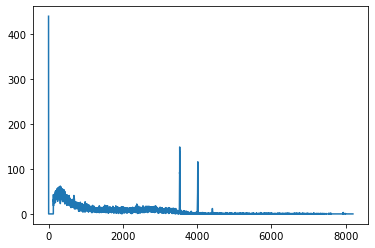

In [4]:
plt.figure(1)
plt.plot(data_x, data_y)

[ 138.26572656 3531.68491478   -4.08911705  110.78504623 4017.1771155
    4.09414132]


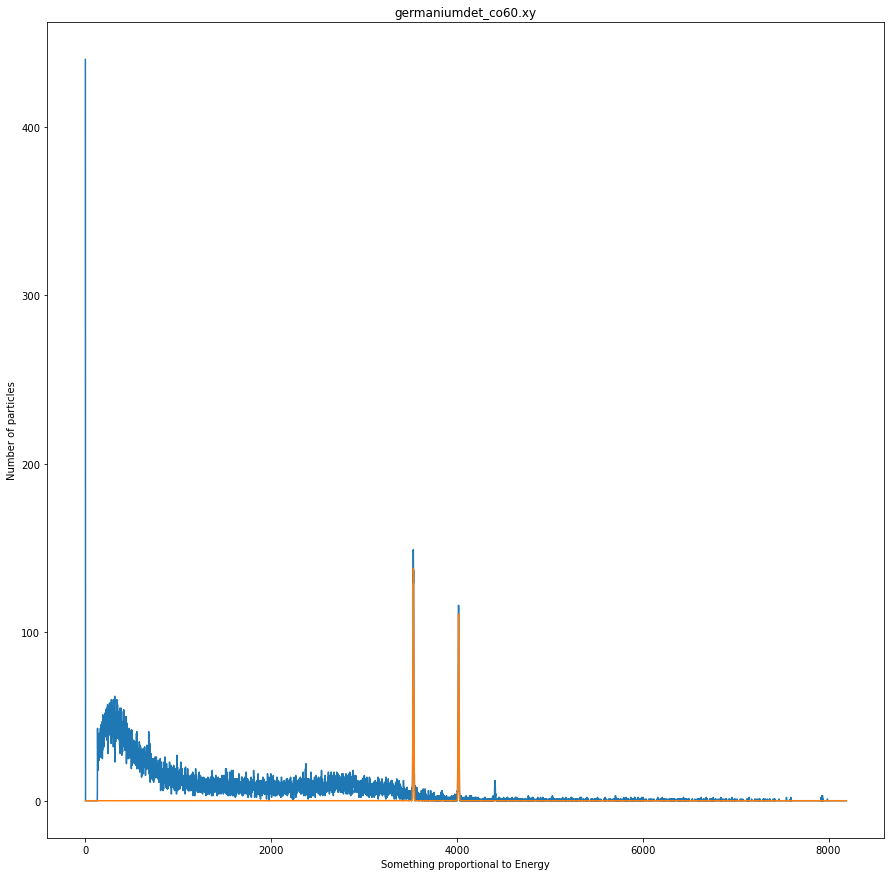

In [5]:

def model(x, A, a_1, b_1, B, a_2, b_2):
    return (A * np.exp(-((x-a_1)**2)/(2*b_1**2)) + B * np.exp(-1.0 * (x - a_2)**2 / (2 * b_2**2)))

init_guess=[160, 3500, 10, 120, 4000, 10]
fit=curve_fit(model, data_x, data_y, p0=init_guess)

ans,cov=fit
fit_A,fit_a_1, fit_b_1, fit_B, fit_a_2, fit_b_2 = ans

print(ans)
plt.figure(1,figsize=(15,15))

plt.plot(data_x, data_y)

plt.title('germaniumdet_co60.xy')
plt.xlabel('Something proportional to Energy')
plt.ylabel('Number of particles')

t=data_x
plt.plot(t, model(t,fit_A, fit_a_1,fit_b_1, fit_B, fit_a_2, fit_b_2))




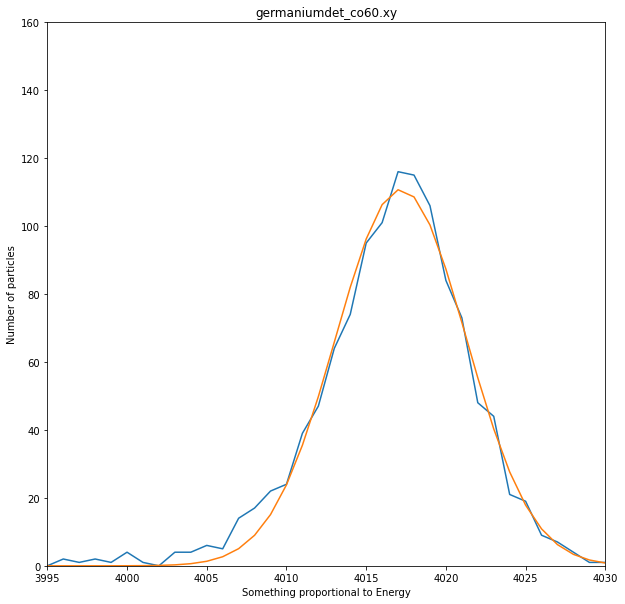

In [6]:
plt.figure(1,figsize=(10,10))
plt.axis([3995,4030,0,160])
plt.plot(data_x, data_y)
#plt.plot(data_x, fit_function)
plt.title('germaniumdet_co60.xy')
plt.xlabel('Something proportional to Energy')
plt.ylabel('Number of particles')

t=data_x
plt.plot(t, model(t,fit_A, fit_a_1,fit_b_1, fit_B, fit_a_2, fit_b_2))
